In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [59]:
file_path = "C:\\Users\\ChazinBrahma\\Downloads\\archive (30)\\bank.csv"
df = pd.read_csv(file_path)

In [60]:
def explore_data(df): 
    print("Data Shape (Rows, Columns): ", df.shape)
    print("\nColumn Info: \n")
    print(df.info())
    print("\nFirst 5 Rows of Data:\n")
    print(df.head())
    print("\nSummary Statistics:\n")
    print(df.describe())
    print("\nChecking for Missing Values:\n")
    print(df.isnull().sum())
    print("\nUnique values in each column:\n")
    print(df.nunique())

In [61]:
explore_data(df)

Data Shape (Rows, Columns):  (11162, 17)

Column Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None

First 5 Rows of Data:

   age       

In [62]:
def univariate_analysis(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns 
    categorical_columns = df.select_dtypes(include=['object']).columns 

    df[numerical_columns].hist(bins=15, figsize=(15,10), layout=(3, 3))
    plt.suptitle('Distribution of Numerical Features')
    plt.show()

    for col in categorical_columns: 
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.show()

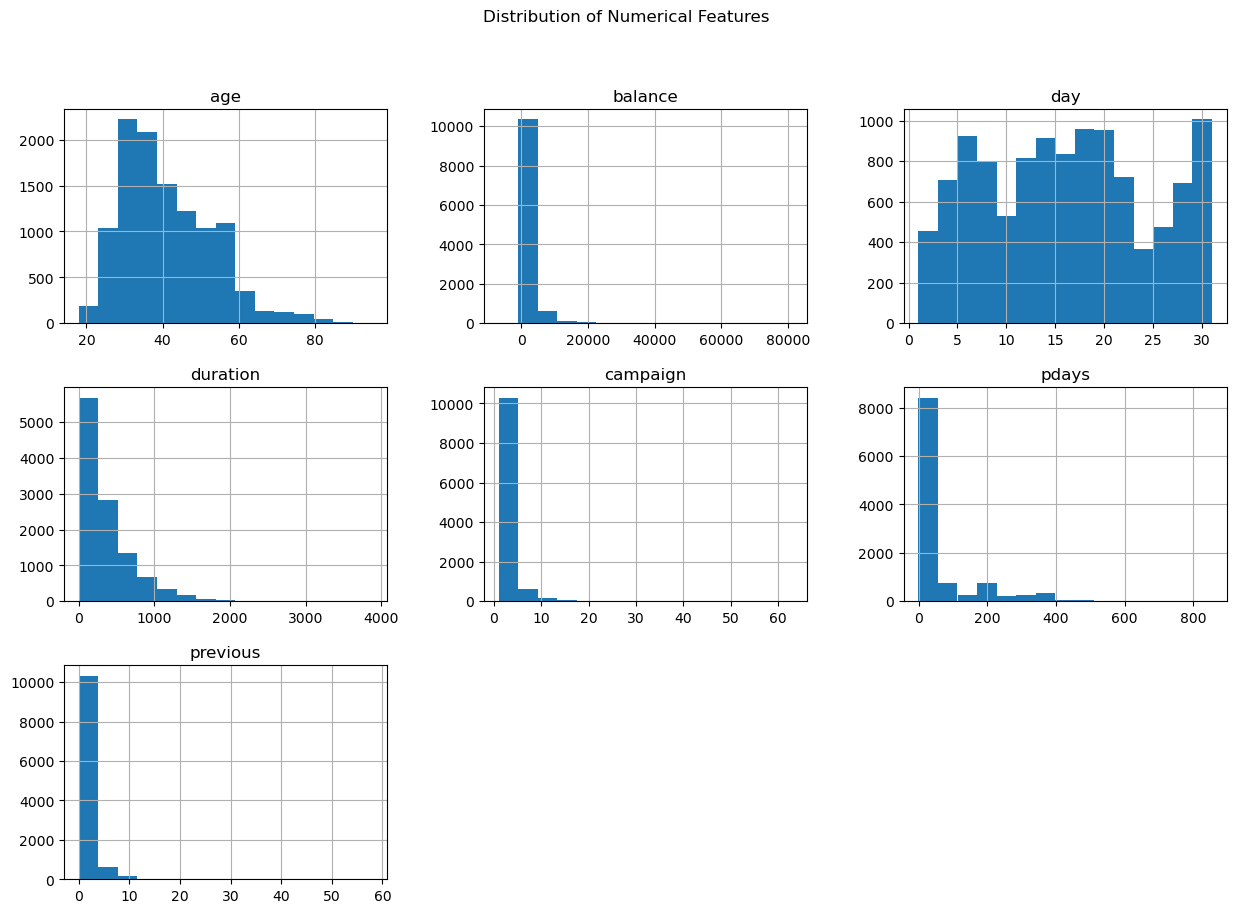

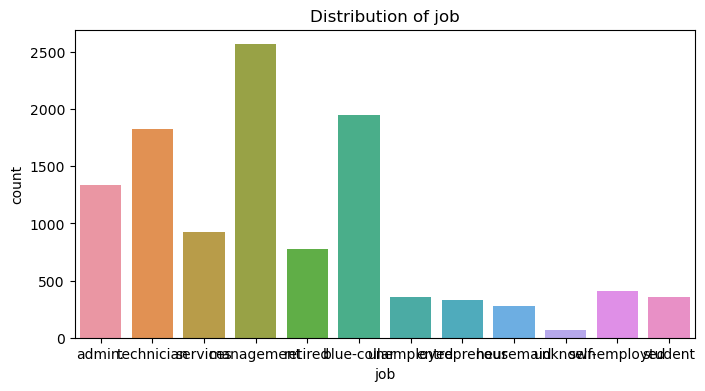

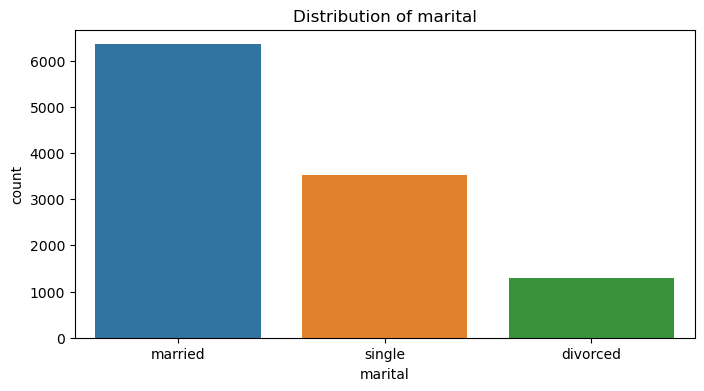

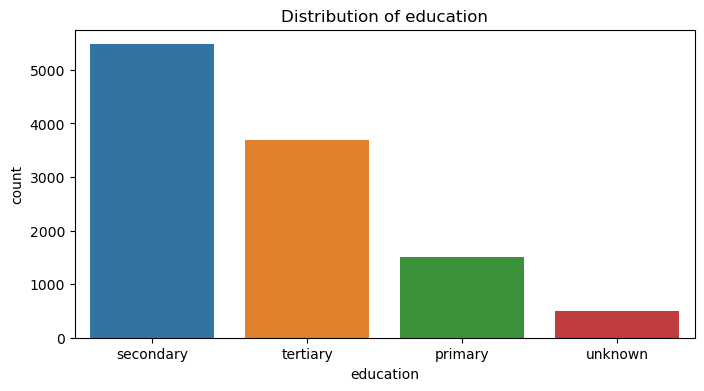

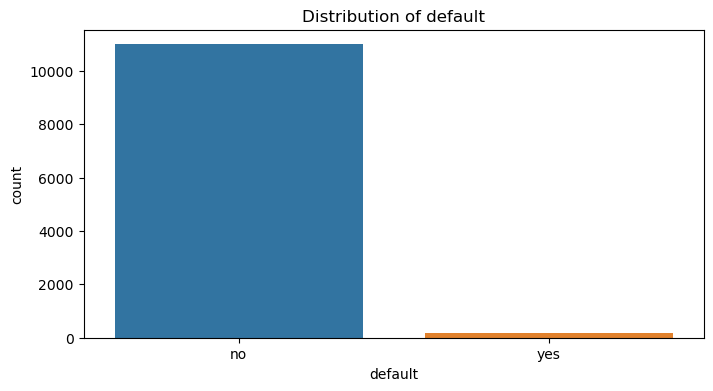

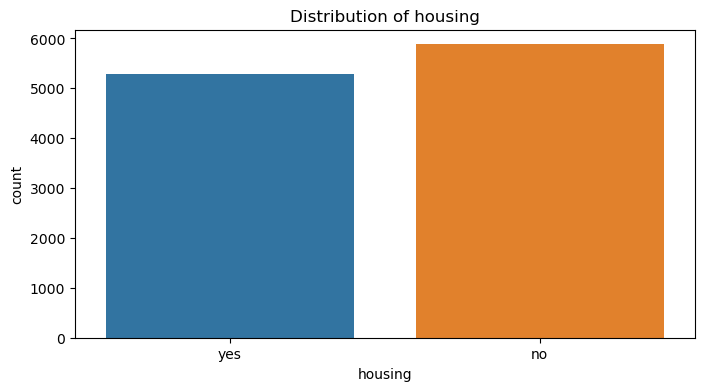

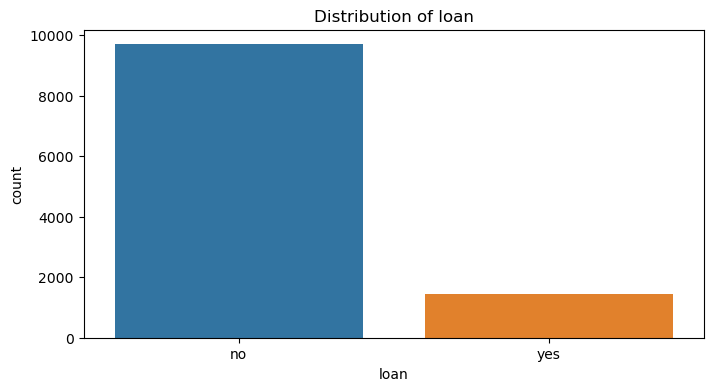

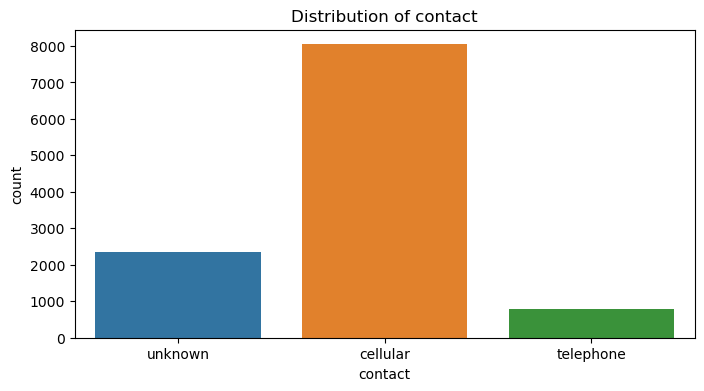

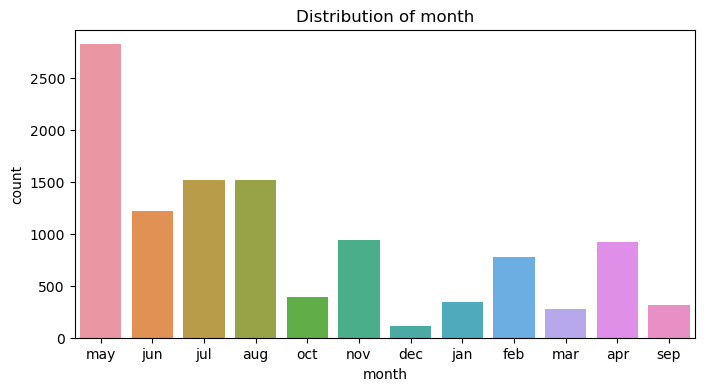

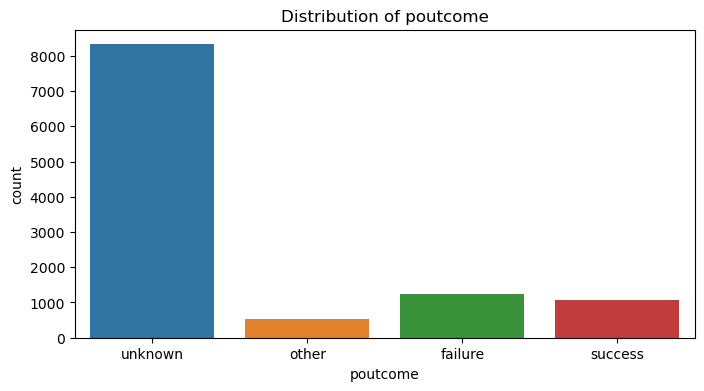

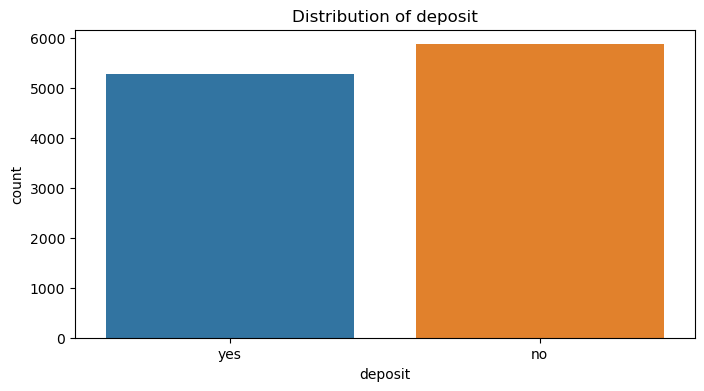

In [63]:
univariate_analysis(df)

In [64]:
def bivariate_analysis(df):

    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns 
    categorical_columns = df.select_dtypes(include=['object']).columns 
    
    plt.figure(figsize=(10,6))
    sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix of Numerical Features")
    plt.show()

    plt.figure(figsize=(10,6))
    sns.boxplot(x='job', y='balance', data=df)
    plt.title('Balance vs Job type')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(8,5))
    sns.boxplot(x='deposit', y='duration', data=df)
    plt.title('Duration vs Deposit Subscription')
    plt.show()

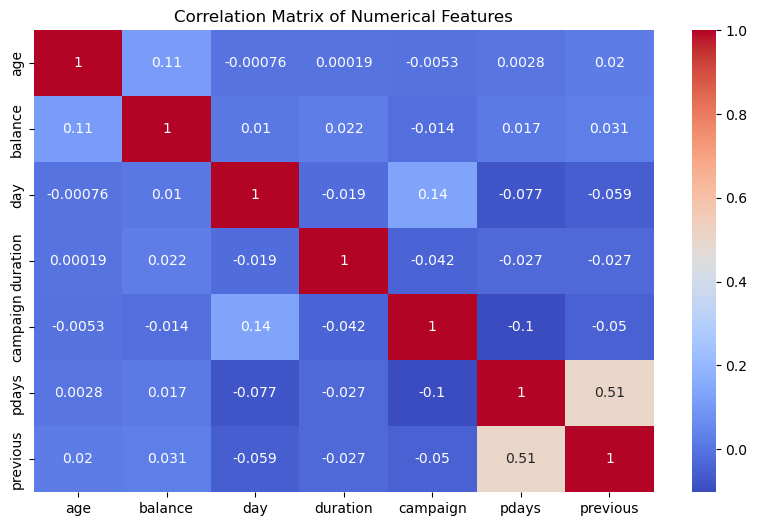

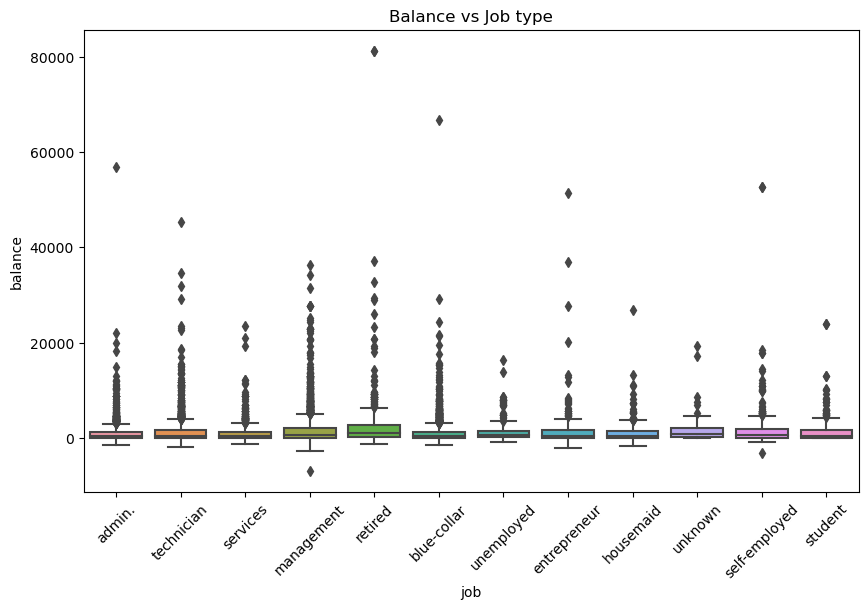

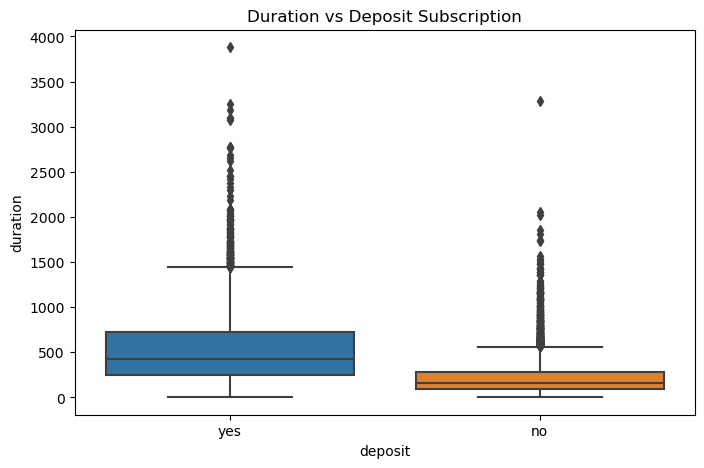

In [65]:
bivariate_analysis(df)

In [66]:
def missing_outliers_analysis(df): 
    print("\nMissing Data Analysis:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    plt.figure(figsize=(8,5))
    sns.boxplot(df['balance'])
    plt.title('Boxplot for Balance (Outliers Detection)')
    plt.show() 

    plt.figure(figsize=(8,5))
    sns.boxplot(df['duration'])
    plt.title('Boxplot for Duration (Outliers Detection)')
    plt.show()


Missing Data Analysis:
Series([], dtype: int64)


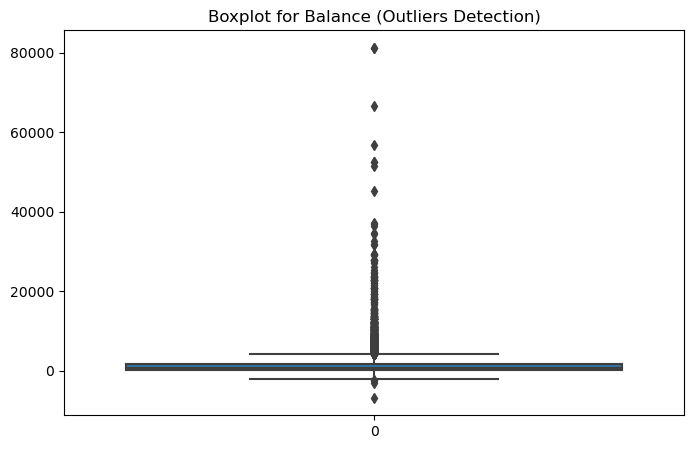

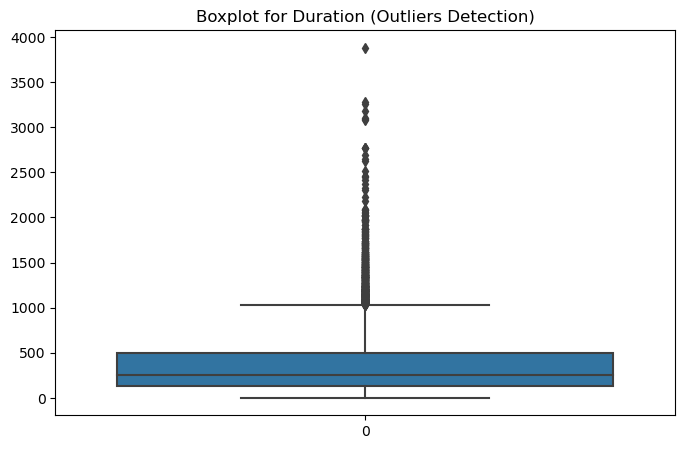

In [67]:
missing_outliers_analysis(df)

In [68]:
def target_variable_analysis(df): 
    plt.figure(figsize=(6,4))
    sns.countplot(x='deposit', data=df)
    plt.title('Distribution of Deposit Subscription')
    plt.show()

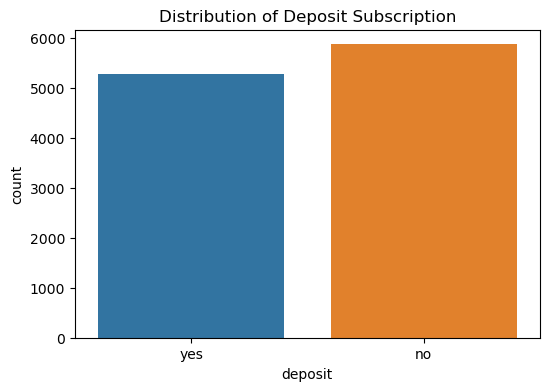

In [69]:
target_variable_analysis(df)

In [70]:
def handle_outliers(df):
    columns_to_cap = ['balance', 'duration', 'campaign', 'previous']

    for col in columns_to_cap:
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)

        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

In [71]:
df_cleaned = handle_outliers(df)

In [72]:
explore_data(df_cleaned)

Data Shape (Rows, Columns):  (11162, 17)

Column Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  float64
 12  campaign   11162 non-null  float64
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  float64
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB
None

First

In [73]:
class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        
        self.numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')), 
            ('scaler', StandardScaler())
        ])

   
        self.categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        self.preprocessor = ColumnTransformer(transformers=[
            ('num', self.numeric_transformer, ['age', 'balance', 'duration', 'campaign', 'previous']), 
            ('cat', self.categorical_transformer, ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month'])
        ])

    def fit(self, X, y=None):
        self.preprocessor.fit(X, y)
        return self 

    def transform(self, X): 
        X_transformed = self.preprocessor.transform(X)
        return X_transformed 

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


def preprocess_data(df_cleaned): 
   
    df_cleaned = df_cleaned.drop(columns=['day'])

    
    df_cleaned['was_contacted'] = df_cleaned['pdays'].apply(lambda x: 0 if x == -1 else 1)
    df_cleaned = df_cleaned.drop(columns=['pdays'])

    features = df_cleaned.drop(columns=['deposit'])

    
    preprocessor = Preprocessor()
    X_processed = preprocessor.fit_transform(features)

    return X_processed

        

In [74]:
X = preprocess_data(df_cleaned)
print(X)

  (0, 0)	1.491504880292054
  (0, 1)	0.3925387126027457
  (0, 2)	2.0575383416748485
  (0, 3)	-0.658754705315292
  (0, 4)	-0.4319881388837322
  (0, 5)	1.0
  (0, 18)	1.0
  (0, 21)	1.0
  (0, 24)	1.0
  (0, 27)	1.0
  (0, 28)	1.0
  (0, 32)	1.0
  (0, 36)	1.0
  (0, 45)	1.0
  (1, 0)	1.2396756668140116
  (1, 1)	-0.5963091762415602
  (1, 2)	3.3550696497083
  (1, 3)	-0.658754705315292
  (1, 4)	-0.4319881388837322
  (1, 5)	1.0
  (1, 18)	1.0
  (1, 21)	1.0
  (1, 24)	1.0
  (1, 26)	1.0
  (1, 28)	1.0
  :	:
  (11160, 3)	-0.19933452282673905
  (11160, 4)	2.350063330202478
  (11160, 14)	1.0
  (11160, 18)	1.0
  (11160, 21)	1.0
  (11160, 24)	1.0
  (11160, 26)	1.0
  (11160, 29)	1.0
  (11160, 30)	1.0
  (11160, 33)	1.0
  (11160, 45)	1.0
  (11161, 0)	-0.6070718986916326
  (11161, 1)	-0.6156730382946471
  (11161, 2)	0.7935901969081446
  (11161, 3)	-0.658754705315292
  (11161, 4)	-0.4319881388837322
  (11161, 14)	1.0
  (11161, 18)	1.0
  (11161, 21)	1.0
  (11161, 24)	1.0
  (11161, 26)	1.0
  (11161, 28)	1.0
  (11161,

In [75]:
X_dense = X.toarray()  
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

In [76]:
def find_optimal_clusters(X, max_k=10):
    inertia = [] 
    for k in range(1, max_k+1):
        kmeans_pca = KMeans(n_clusters=k, random_state=42)
        kmeans_pca.fit(X)
        inertia.append(kmeans_pca.inertia_)

    plt.figure(figsize=(8,4))
    plt.plot(range(1, max_k+1), inertia, marker='o')
    plt.title('Elbow Method to Determine Optimal Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

    

C:\Users\ChazinBrahma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ChazinBrahma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ChazinBrahma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ChazinBrahma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

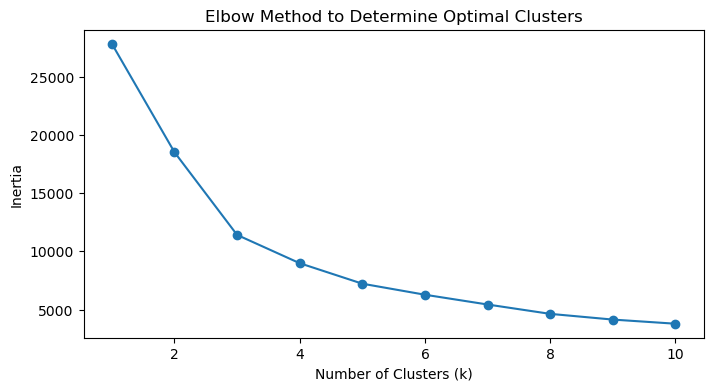

In [77]:
find_optimal_clusters(X_pca, max_k=10)

In [78]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_pca = kmeans.fit_predict(X_pca)

df_cleaned['Cluster'] = clusters_pca

numeric_columns = df_cleaned.select_dtypes(include=[float, int]).columns
numeric_summary = df_cleaned.groupby('Cluster')[numeric_columns].mean()


categorical_columns = df_cleaned.select_dtypes(include=[object]).columns
categorical_summary = df_cleaned.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode()[0])


print("Numeric Summary:")
print(numeric_summary)

print("\nCategorical Summary:")
print(categorical_summary)


C:\Users\ChazinBrahma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Numeric Summary:
               age      balance        day    duration  campaign       pdays  \
Cluster                                                                        
0        34.794721   724.655099  15.806615  375.711235  2.485663   24.209677   
1        53.824625  2576.803339  16.002402  371.999333  2.667868   28.160961   
2        39.802243  1736.480307  14.442739  332.615525  1.786305  195.144628   

         previous  Cluster  
Cluster                     
0        0.128055      0.0  
1        0.244444      1.0  
2        4.171192      2.0  

Categorical Summary:
                job  marital  education default housing loan   contact month  \
Cluster                                                                        
0        management  married  secondary      no     yes   no  cellular   may   
1        management  married  secondary      no      no   no  cellular   aug   
2        management  married  secondary      no      no   no  cellular   may   

        poutco

C:\Users\ChazinBrahma\AppData\Local\Temp\ipykernel_27692\2038414739.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='balance', data=df_cleaned, ci=None)


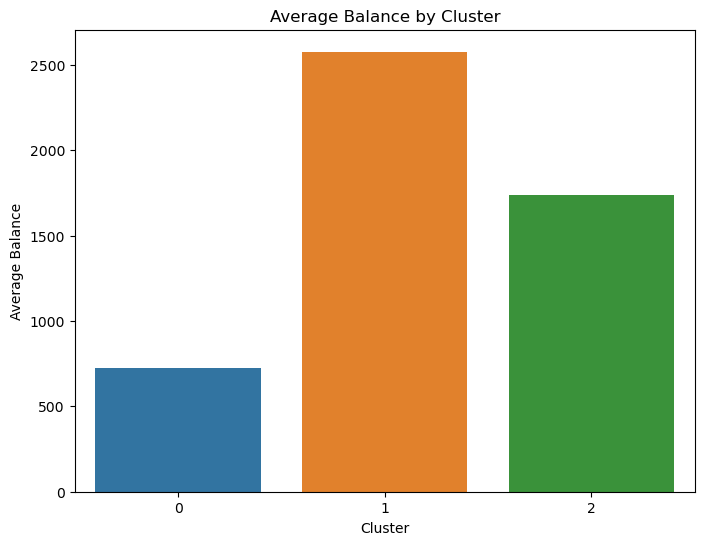

C:\Users\ChazinBrahma\AppData\Local\Temp\ipykernel_27692\2038414739.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='age', data=df_cleaned, ci=None)


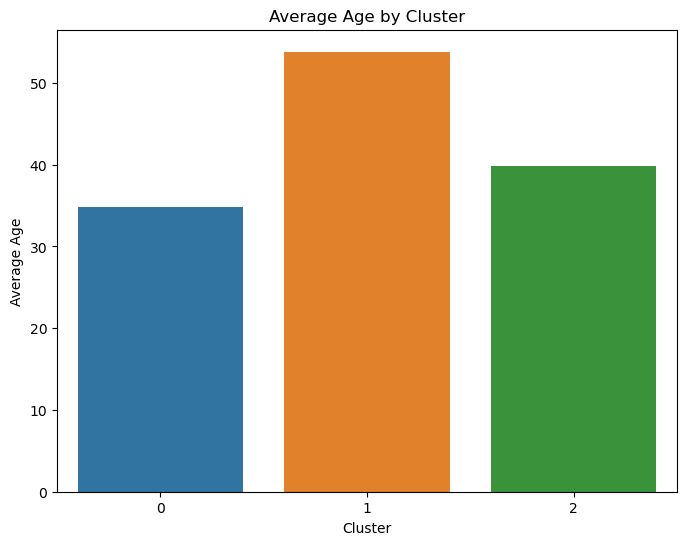

C:\Users\ChazinBrahma\AppData\Local\Temp\ipykernel_27692\2038414739.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='duration', data=df_cleaned, ci=None)


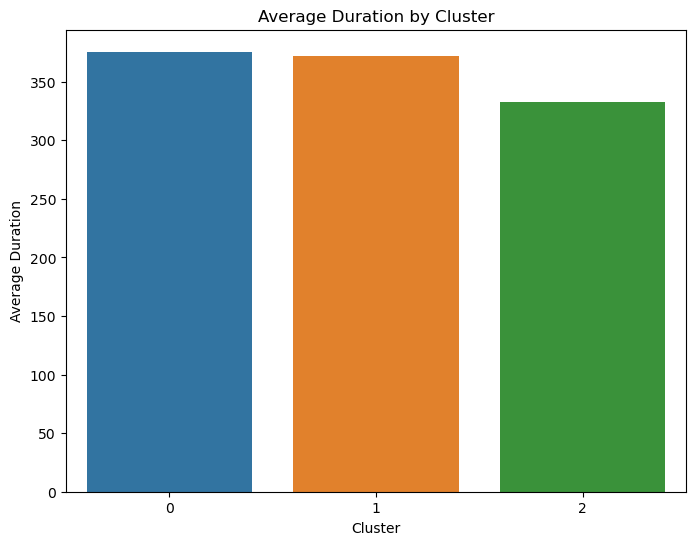

C:\Users\ChazinBrahma\AppData\Local\Temp\ipykernel_27692\2038414739.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='pdays', data=df_cleaned, ci=None)


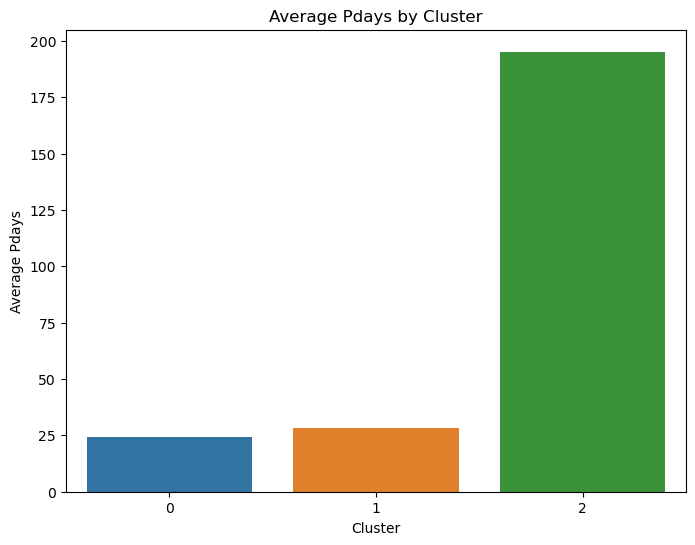

In [79]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='balance', data=df_cleaned, ci=None)
plt.title('Average Balance by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Balance')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='age', data=df_cleaned, ci=None)
plt.title('Average Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='duration', data=df_cleaned, ci=None)
plt.title('Average Duration by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Duration')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='pdays', data=df_cleaned, ci=None)
plt.title('Average Pdays by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Pdays')
plt.show()


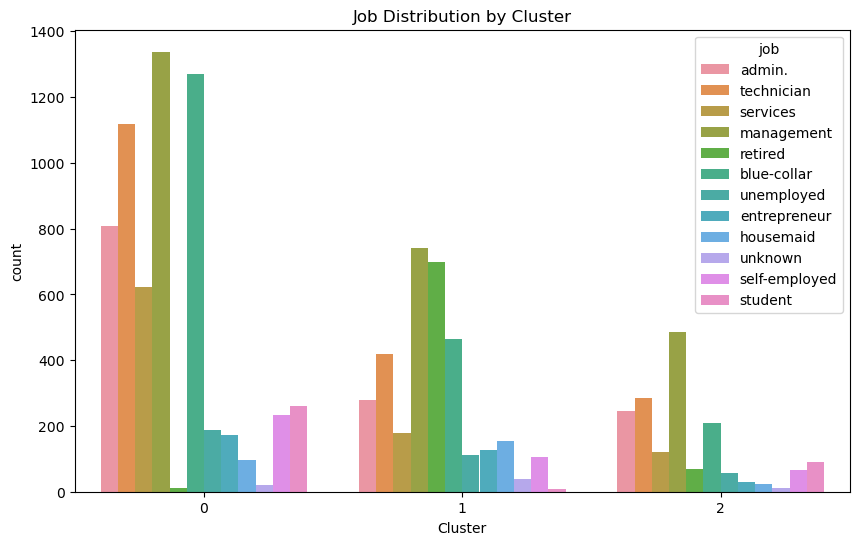

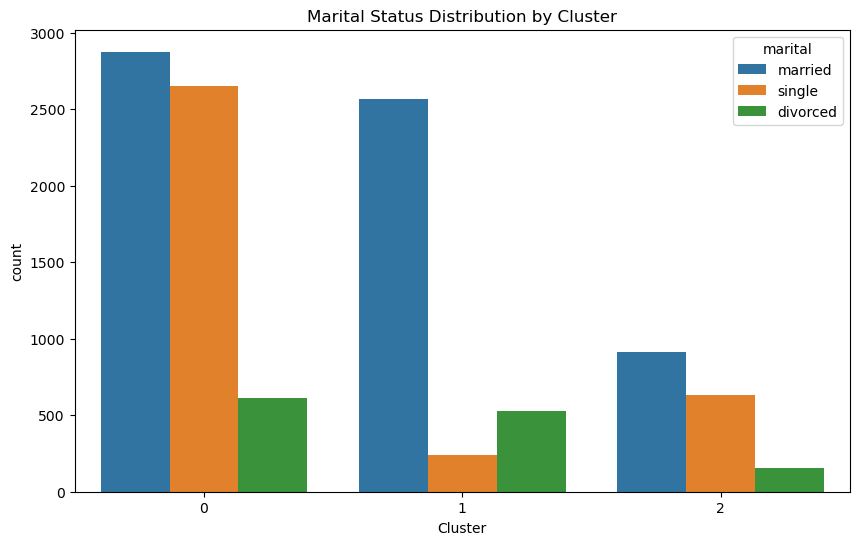

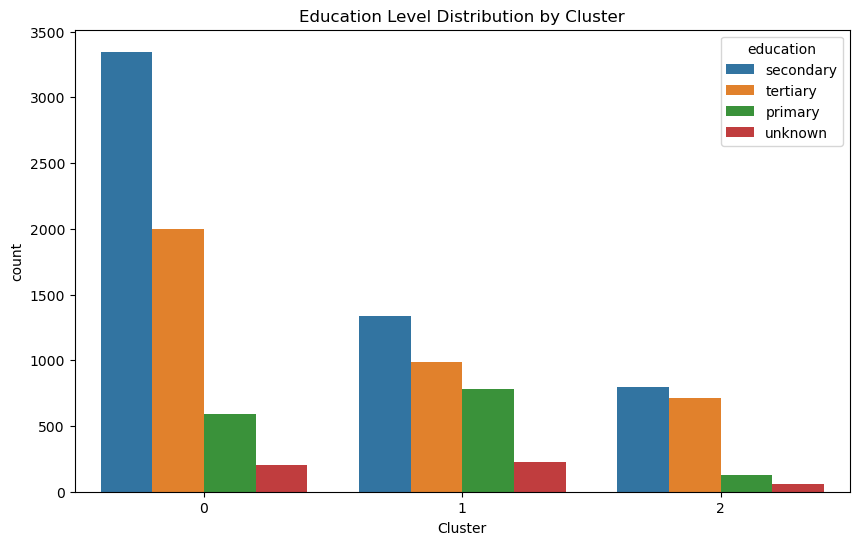

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='job', data=df_cleaned)
plt.title('Job Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='marital', data=df_cleaned)
plt.title('Marital Status Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='education', data=df_cleaned)
plt.title('Education Level Distribution by Cluster')
plt.show()

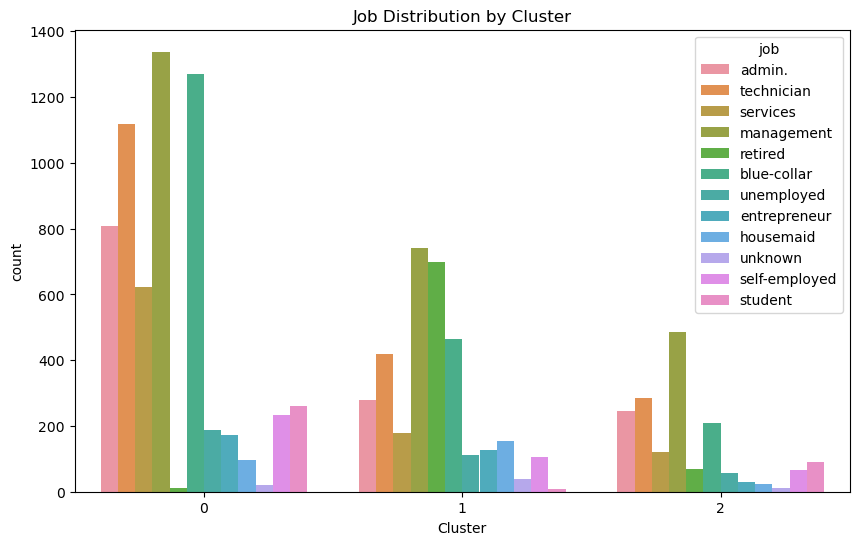

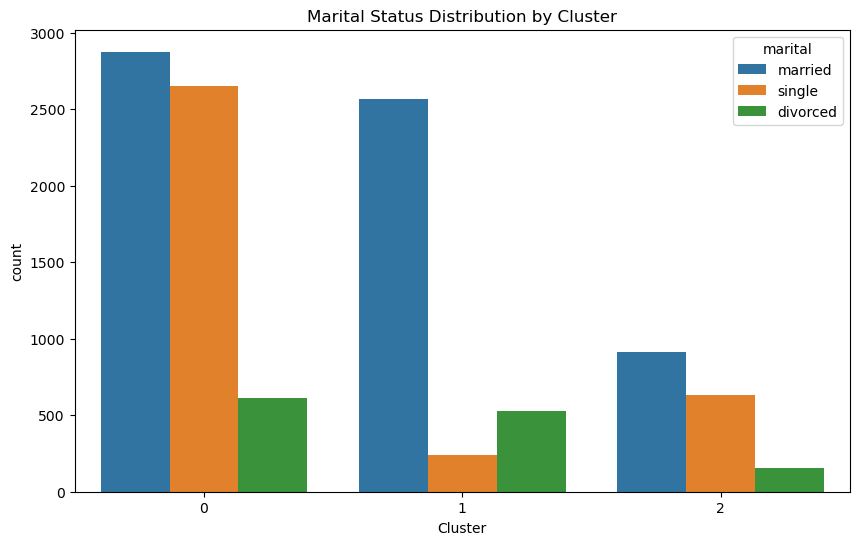

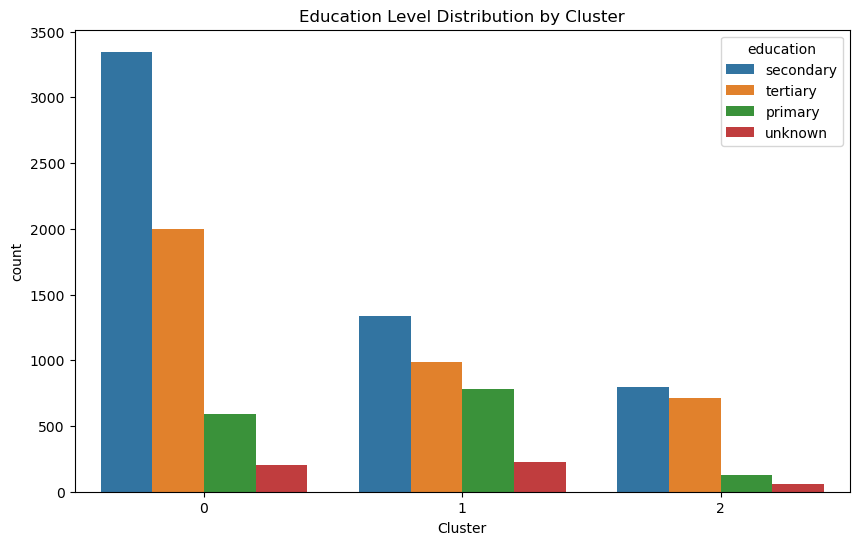

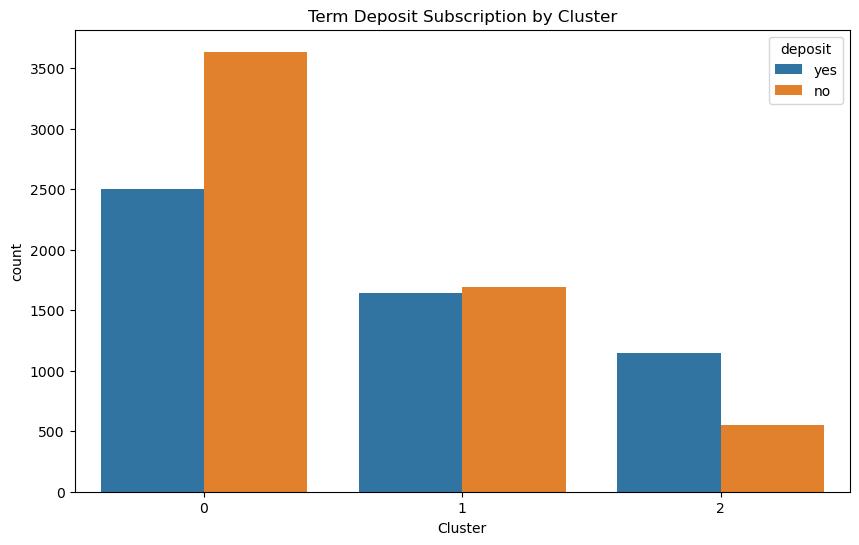

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='job', data=df_cleaned)
plt.title('Job Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='marital', data=df_cleaned)
plt.title('Marital Status Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='education', data=df_cleaned)
plt.title('Education Level Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='deposit', data=df_cleaned)
plt.title('Term Deposit Subscription by Cluster')
plt.show()

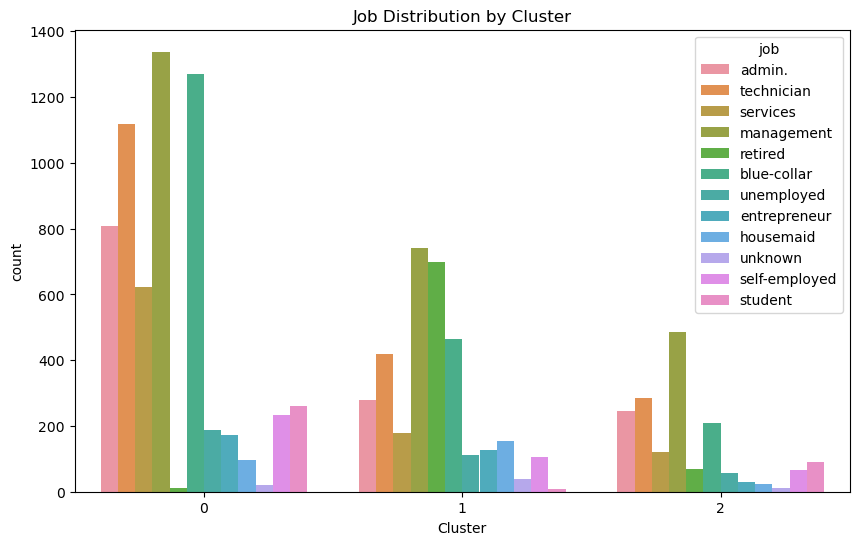

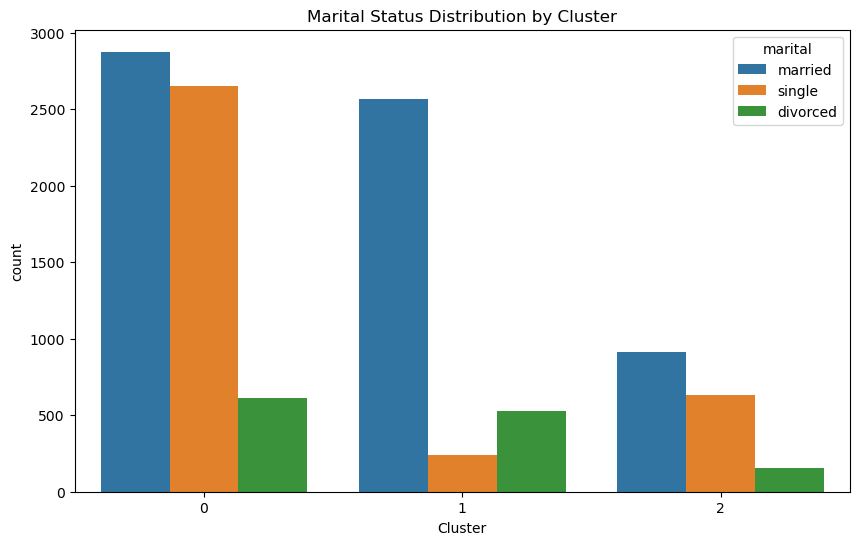

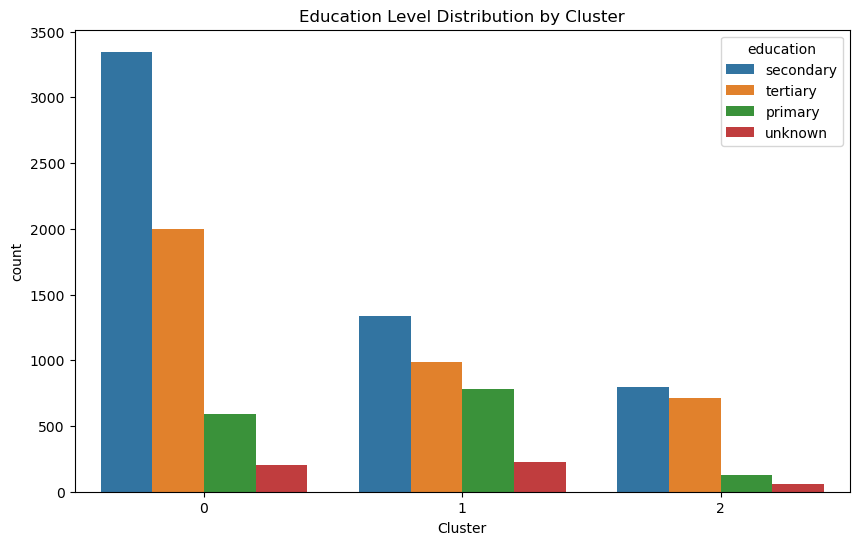

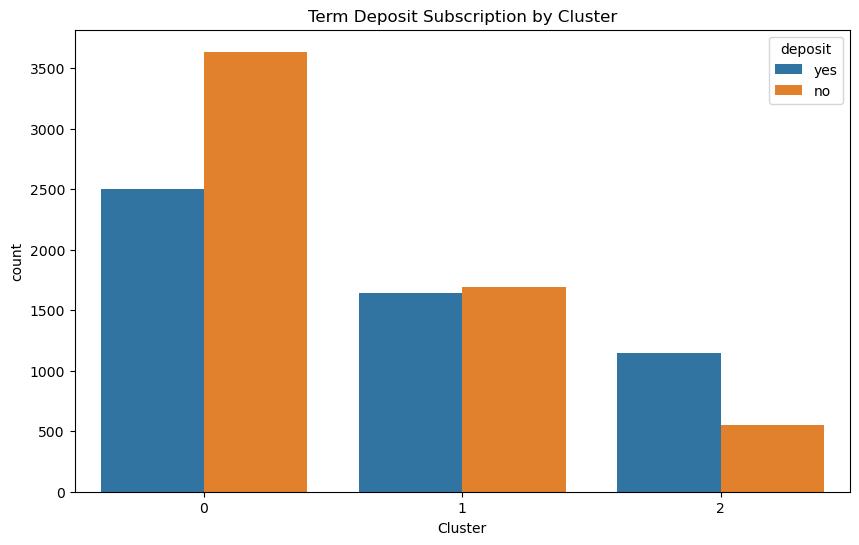

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='job', data=df_cleaned)
plt.title('Job Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='marital', data=df_cleaned)
plt.title('Marital Status Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='education', data=df_cleaned)
plt.title('Education Level Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='deposit', data=df_cleaned)
plt.title('Term Deposit Subscription by Cluster')
plt.show()

In [83]:
sil_score = silhouette_score(X_pca, clusters_pca)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.42547036464075666


In [84]:
silhouette_avg = silhouette_score(X_pca, clusters_pca) 
print(f'Silhouette Score: {silhouette_avg}')

sample_silhouette_values = silhouette_samples(X_pca, clusters_pca)  

Silhouette Score: 0.42547036464075666


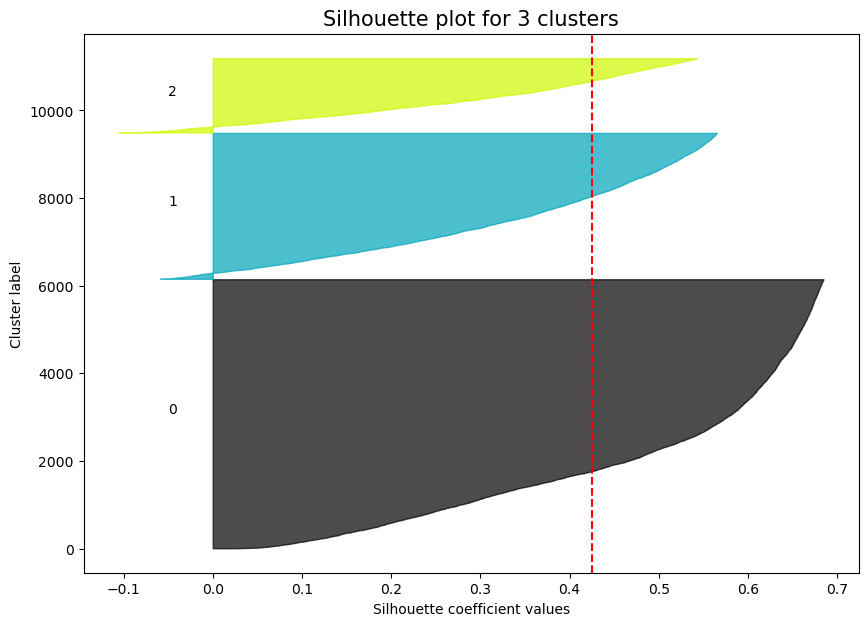

Average Silhouette Score: 0.42547036464075666


In [85]:
plt.figure(figsize=(10, 7))
y_lower = 10
optimal_k = len(set(clusters_pca)) 

for i in range(optimal_k):
    
    ith_cluster_silhouette_values = sample_silhouette_values[clusters_pca == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the space between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title(f'Silhouette plot for {optimal_k} clusters', fontsize=15)
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()

print(f"Average Silhouette Score: {silhouette_avg}")
